Imports

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import import_ipynb
from PrepareData import get_complete_app_df

Get the database

In [7]:
app_df = get_complete_app_df()

Show graphs depicting the quality of apps

In [8]:
category_app_df = app_df.groupby(by="Category").median().reset_index()
order_ = category_app_df.sort_values("Quality")["Category"]
order_ = order_[::-1]


In [ ]:
sns.set(rc={"figure.figsize": (10, 10)})
sns.stripplot(y="Category", x="Quality", data=category_app_df, order=order_)
plt.grid()
plt.xscale("log")
plt.show()

In [ ]:
sns.set(rc={"figure.figsize": (10, 10)})
sns.boxplot(y="Category", x="Quality", data=app_df, order=order_[:10])
plt.grid()
plt.xscale("log")
plt.show()

In [104]:
top_ten_df = app_df[app_df["Category"].isin(order_[:10])]

top_ten_df = top_ten_df.groupby(by="Category").count().reset_index()

top_ten_df = top_ten_df.drop(top_ten_df[top_ten_df["App"] == 0].index)

top_ten_df["Category"] = top_ten_df["Category"].cat.remove_unused_categories()

def sorter(row):
    row["Sorted"] = list(order_).index(row["Category"])
    return row

top_ten_df = top_ten_df.apply(sorter, axis=1)
top_ten_df = top_ten_df.sort_values("Sorted")

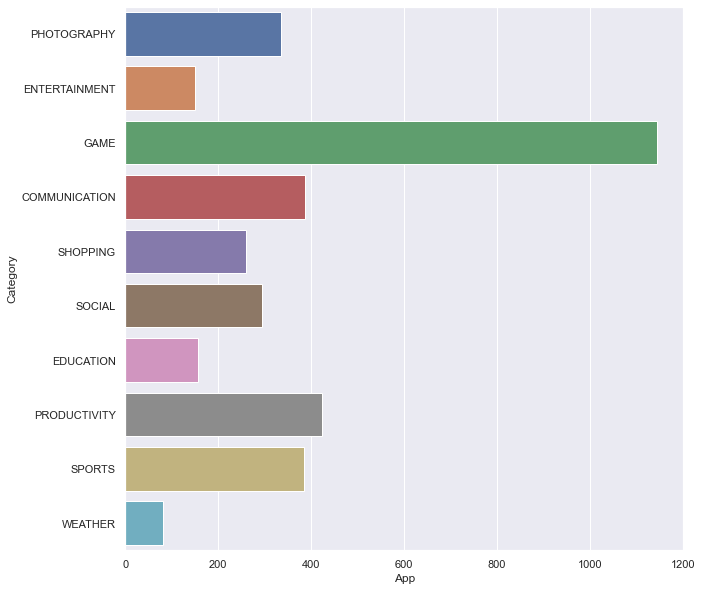

In [112]:
sns.barplot(x="App", y="Category", data=top_ten_df)
plt.show()

In [ ]:
for i in app_df[app_df["Category"] == "PHOTOGRAPHY"].sort_values(by="Quality", ascending=False)["App"]:
    print(i)